In [2]:
#importing libraries
import seaborn as sns
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

/opt/anaconda3/envs/p_da_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:
df_DA=df[df['job_title_short']=='Data Analyst'].copy()   #filtering data analyst jobs

In [4]:
df_DA.dropna(subset=['job_skills','salary_year_avg'],inplace=True)

In [5]:
df_DA['job_title_short'].value_counts()

job_title_short
Data Analyst    4845
Name: count, dtype: int64

In [6]:
len(df_DA)

4845

In [7]:
df_DA_exploded=df_DA.explode('job_skills')

In [8]:
df_DA_exploded['job_skills'].value_counts()

job_skills
sql              3079
excel            2135
python           1838
tableau          1657
r                1073
                 ... 
ruby on rails       1
erlang              1
wrike               1
datarobot           1
clickup             1
Name: count, Length: 177, dtype: int64

In [48]:
df_da_high_demand=df_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(median_salary='median',skill_count='count').sort_values(by='skill_count',ascending=False).reset_index().head(12)
df_da_high_demand['percentage']=(df_da_high_demand['skill_count']/len(df_DA)*100).round(0).astype(int)
df_da_high_demand

,job_skills,median_salary,skill_count,percentage
0,sql,92500.0,3079,64
1,excel,84479.0,2135,44
2,python,98500.0,1838,38
3,tableau,95000.0,1657,34
4,r,92527.5,1073,22
5,power bi,90000.0,1042,22
6,sas,90000.0,1006,21
7,word,80000.0,523,11
8,powerpoint,85000.0,518,11
9,sql server,92150.0,336,7


In [10]:
demand_list=df_da_high_demand['job_skills']

In [11]:
df_da_high_salary=df_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(median_salary='median',skill_count='count').sort_values(by='median_salary',ascending=False).reset_index().head(10)
df_da_high_salary['percentage']=(df_da_high_salary['skill_count']/len(df_DA)*100).round(2)
df_da_high_salary

,job_skills,median_salary,skill_count,percentage
0,svn,400000.0,1,0.02
1,solidity,179000.0,1,0.02
2,dplyr,167500.0,3,0.06
3,gitlab,163782.0,7,0.14
4,terraform,163782.0,3,0.06
5,couchbase,160515.0,1,0.02
6,datarobot,155485.5,1,0.02
7,golang,155000.0,2,0.04
8,mxnet,149000.0,2,0.04
9,vmware,147500.0,1,0.02


In [12]:
salary_list=df_da_high_salary['job_skills']

In [13]:
from adjustText import adjust_text

/var/folders/jg/9_yq4crd40bc84tn82nc31nm0000gn/T/ipykernel_46328/281688.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend().remove()
/var/folders/jg/9_yq4crd40bc84tn82nc31nm0000gn/T/ipykernel_46328/281688.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend().remove()


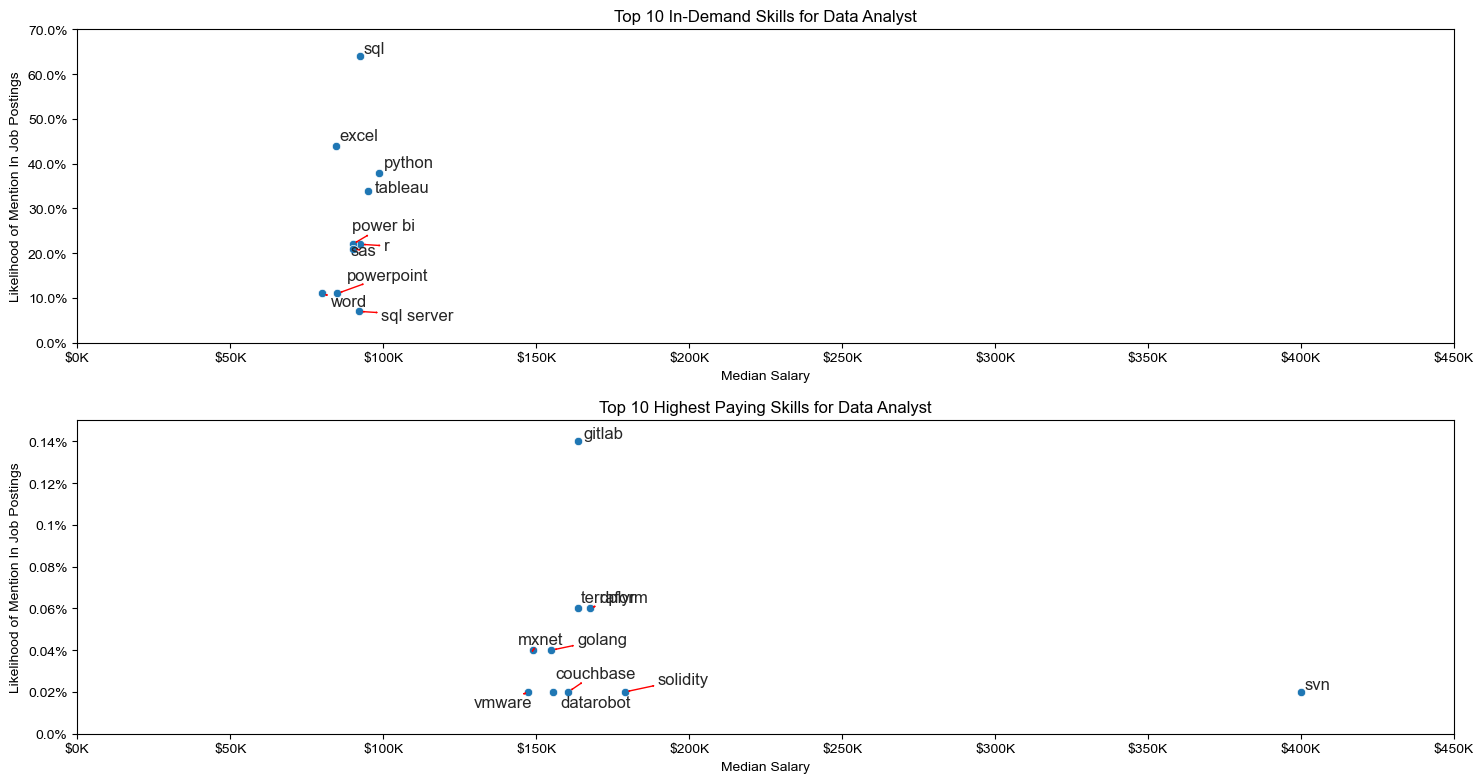

In [14]:
fig,ax=plt.subplots(2,1,figsize=(15,8))
sns.set_theme(style="ticks")    
sns.scatterplot(data=df_da_high_demand,y='percentage',x='median_salary',ax=ax[0])#high skill posting
ax[0].set_title('Top 10 In-Demand Skills for Data Analyst')
ax[0].set_ylabel('Likelihood of Mention In Job Postings')
ax[0].set_xlabel('Median Salary')
ax[0].set_xlim(0,450000)
ax[0].set_ylim(0,70)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{(x)}%'))
texts=[]
for i in df_da_high_demand.index:
    texts.append(ax[0].text(df_da_high_demand['median_salary'][i],
                            df_da_high_demand['percentage'][i],
                            df_da_high_demand['job_skills'][i]))
adjust_text(texts,ax=ax[0],arrowprops=dict(arrowstyle='<->',color='red'))

ax[0].legend().remove()




sns.scatterplot(data=df_da_high_salary,y='percentage',x='median_salary',ax=ax[1])#high salary posting
ax[1].set_title('Top 10 Highest Paying Skills for Data Analyst')
ax[1].set_ylabel('Likelihood of Mention In Job Postings')
ax[1].set_xlabel('Median Salary')
ax[1].set_xlim(0,450000)
ax[1].set_ylim(0,0.15)
texts=[]
for i in df_da_high_salary.index:
    texts.append(ax[1].text(df_da_high_salary['median_salary'][i],
                            df_da_high_salary['percentage'][i],
                            df_da_high_salary['job_skills'][i]))
adjust_text(texts,ax=ax[1],arrowprops=dict(arrowstyle='<->',color='red'))

ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x}%'))
ax[1].legend().remove()

plt.tight_layout()

In [15]:
df_da_high_demand

,job_skills,median_salary,skill_count,percentage
0,sql,92500.0,3079,64
1,excel,84479.0,2135,44
2,python,98500.0,1838,38
3,tableau,95000.0,1657,34
4,r,92527.5,1073,22
5,power bi,90000.0,1042,22
6,sas,90000.0,1006,21
7,word,80000.0,523,11
8,powerpoint,85000.0,518,11
9,sql server,92150.0,336,7


In [30]:
df_DA_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,alteryx,"{'analyst_tools': ['tableau', 'excel', 'altery..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,sql,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,python,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,r,"{'analyst_tools': ['looker'], 'programming': [..."


In [35]:
df_tech=df_DA['job_type_skills'].drop_duplicates()

In [36]:
df_tech

109       {'analyst_tools': ['alteryx', 'tableau'], 'pro...
180              {'analyst_tools': ['excel', 'powerpoint']}
410       {'analyst_tools': ['word', 'excel', 'visio', '...
988       {'analyst_tools': ['excel', 'tableau'], 'progr...
1413      {'analyst_tools': ['excel', 'power bi'], 'prog...
                                ...                        
781764    {'cloud': ['oracle'], 'programming': ['c#', 'j...
782637    {'databases': ['sql server'], 'programming': [...
782773    {'analyst_tools': ['tableau'], 'cloud': ['snow...
782979    {'cloud': ['bigquery', 'gcp'], 'libraries': ['...
783196    {'analyst_tools': ['power bi', 'tableau', 'qli...
Name: job_type_skills, Length: 2632, dtype: object

In [37]:
df_tech=df_tech.dropna()

In [38]:
technology_dict={}
for row in df_tech:
    row_dict = ast.literal_eval(row)
    for key ,value in row_dict.items():
        if key in technology_dict.keys():
            technology_dict[key].extend(value)
        else:
            technology_dict[key]=value

for key,value in technology_dict.items():
    technology_dict[key]=list(set(value))
technology_dict

{'analyst_tools': ['tableau',
  'visio',
  'spss',
  'powerpoint',
  'sas',
  'ms access',
  'cognos',
  'looker',
  'sap',
  'power bi',
  'spreadsheet',
  'ssrs',
  'splunk',
  'ssis',
  'excel',
  'alteryx',
  'sheets',
  'microstrategy',
  'outlook',
  'word',
  'dax',
  'sharepoint',
  'datarobot',
  'qlik'],
 'programming': ['crystal',
  'javascript',
  'sas',
  'powershell',
  'matlab',
  'ruby',
  'scala',
  'visual basic',
  'vba',
  'julia',
  'assembly',
  'cobol',
  'golang',
  'html',
  'perl',
  'c#',
  'nosql',
  'no-sql',
  'solidity',
  'erlang',
  'typescript',
  'java',
  't-sql',
  'mongodb',
  'python',
  'css',
  'r',
  'php',
  'bash',
  'rust',
  'mongo',
  'pascal',
  'fortran',
  'dart',
  'c++',
  'sass',
  'sql',
  'shell',
  'c',
  'vb.net',
  'swift',
  'go'],
 'libraries': ['theano',
  'selenium',
  'pandas',
  'jupyter',
  'airflow',
  'hugging face',
  'matplotlib',
  'ggplot2',
  'dplyr',
  'scikit-learn',
  'numpy',
  'gdpr',
  'pytorch',
  'kafka',
 

In [39]:
df_tech=pd.DataFrame(list(technology_dict.items()),columns=['technology','skills'])
df_tech

,technology,skills
0,analyst_tools,"[tableau, visio, spss, powerpoint, sas, ms acc..."
1,programming,"[crystal, javascript, sas, powershell, matlab,..."
2,libraries,"[theano, selenium, pandas, jupyter, airflow, h..."
3,cloud,"[aws, gcp, ibm cloud, bigquery, watson, coloca..."
4,os,"[linux, arch, macos, windows, unix]"
5,webframeworks,"[vue, jquery, angular, express, ruby, flask, p..."
6,other,"[terraform, npm, puppet, terminal, atlassian, ..."
7,sync,"[slack, zoom, twilio, microsoft teams, unify, ..."
8,databases,"[elasticsearch, sqlite, sql server, mongodb, d..."
9,async,"[jira, wrike, clickup, asana, airtable, trello..."


In [42]:
df_tech=df_tech.explode('skills')

In [49]:
df_da_high_demand=df_da_high_demand.merge(df_tech,left_on='job_skills',right_on='skills')

6 [-0.1372698  -0.40884296]
7 [-0.45877396 -0.18714163]


([Text(65.50335181451614, 92901.78571428572, 'sql'),
  Text(46.6288558467742, 84880.78571428572, 'excel'),
  Text(41.47298387096774, 98964.79724702382, 'python'),
  Text(37.77847782258064, 95461.30952380953, 'tableau'),
  Text(22.33908014112903, 93092.9761904762, 'r'),
  Text(26.56633064516129, 90982.14285714287, 'power bi'),
  Text(23.924732231085642, 89886.37839496178, 'sas'),
  Text(22.211200042552882, 88768.62252218337, 'sas'),
  Text(13.460030241935485, 80401.78571428572, 'word'),
  Text(16.627520161290324, 85524.32105654763, 'powerpoint'),
  Text(11.91202116935484, 92611.30952380953, 'sql server'),
  Text(10.175529233870968, 95461.30952380953, 'oracle'),
  Text(8.950428427419357, 100461.30952380953, 'azure')],
  <matplotlib.patches.FancyArrowPatch at 0x32bf80350>])

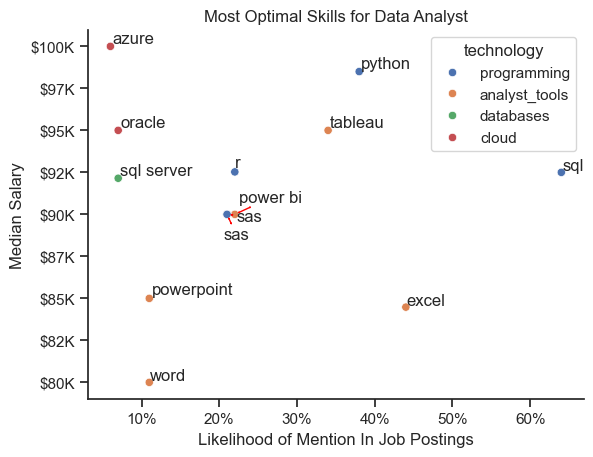

In [51]:
sns.scatterplot(data=df_da_high_demand,x='percentage',y='median_salary',hue='technology')
sns.set_theme(style="ticks")
sns.despine()
ax=plt.gca()

ax.set_title('Most Optimal Skills for Data Analyst')
ax.set_xlabel('Likelihood of Mention In Job Postings')
ax.set_ylabel('Median Salary')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
texts=[]
for i in df_da_high_demand.index:
    texts.append(ax.text(df_da_high_demand['percentage'][i],
                            df_da_high_demand['median_salary'][i],
                            df_da_high_demand['job_skills'][i]))
adjust_text(texts,ax=ax,arrowprops=dict(arrowstyle='<->',color='red'))

